# Learn basic numpy

## Arrays

In [7]:
import numpy as np

a = np.array([1,2,3])
print(type(a))
print(a.shape)   # shape: tuple of array dimensions
print(a[2])
a[0]=5
print(a)

b = np.array([[1,2,3],[4,5,6]])
print(b.shape)
print(b[1,1])

<class 'numpy.ndarray'>
(3,)
3
[5 2 3]
(2, 3)
5


### example - object destructure


In [9]:
info=['tom', 'male', 38, 'winkriver\'s town']
name, sex, *other = info
print(name, sex)
print(other)

tom male
[38, "winkriver's town"]


### create arrays

In [10]:
import numpy as np

a = np.zeros((2,2))
print(a)

b = np.ones((1,2))
print(b)

c = np.full((2,3),7)   # create a constant array
print(c)

d = np.eye(2)   # create a 2x2 identity matrix
print(d)

e = np.random.random((2,3))
print(e)

[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]]
[[7 7 7]
 [7 7 7]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 0.15396928  0.07343066  0.64046725]
 [ 0.62651156  0.00098579  0.81257487]]


### Array indexing

#### Slicing

In [15]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

# A slice is a view into the same data, so moifying it will
# modify the original data
print(a[0,1])
b[0,0] = 77 
print(a[0,1])


[[2 3]
 [6 7]]
2
77


#### Mix integer indexing with slice indexing

In [1]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]
row_r2 = a[1:2, :]
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)


[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer array index

In [16]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

print(np.array([a[0,0],a[1,1],a[2,0]]))

### trick ###
b = np.arange(12).reshape((4,3)) + 1
# b.shape = (4,3)
print(b)
# create an array of indices
c = np.array([0,2,0,1])
print(b[np.arange(4), c])



[1 4 5]
[1 4 5]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]


#### Boolean array index

In [19]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a>2)

print(bool_idx)

print(a[bool_idx])

print(a[a>2]) 

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


#### Datatypes

Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

In [1]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype) 

x = np.array([1.0, 3.2])
print(x.dtype)

x = np.array([1.2, 2.2], dtype=np.int64)
print(x)

x = np.array([1.2, 2.2], dtype=np.float64)
print(x)

int64
float64
[1 2]
[ 1.2  2.2]


### Copy and deep copy

Use array slicing or split is a pointer to source; change slice or split will change source.

To get a new obj, use deep copy: array.copy()

In [11]:
import numpy as np

a = np.arange(12).reshape((3,4))
print(a)

b = a
print('b is a: ', b is a)

b[1,1] = 8
print(a)

second_row_by_split = np.vsplit(a, 3)[1]
print(second_row_by_split)

second_row = a[1]
print(second_row)
second_row[2] = 33
print(second_row)
print(a[1])

print('-----change in split row-------')
second_row_by_split[0,2] = 3333
print(second_row)
print(a[1])

c = a.copy()
print('c is a: ', c is a)
c[1,2] = 555
print(c)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b is a:  True
[[ 0  1  2  3]
 [ 4  8  6  7]
 [ 8  9 10 11]]
[[4 8 6 7]]
[4 8 6 7]
[ 4  8 33  7]
[ 4  8 33  7]
-----change in split row-------
[   4    8 3333    7]
[   4    8 3333    7]
c is a:  False
[[  0   1   2   3]
 [  4   8 555   7]
 [  8   9  10  11]]
[[   0    1    2    3]
 [   4    8 3333    7]
 [   8    9   10   11]]


## Numpy in CV

### graylevel transform

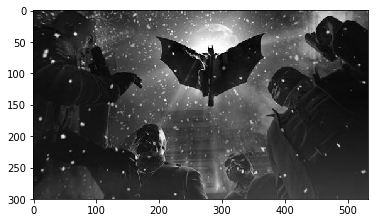

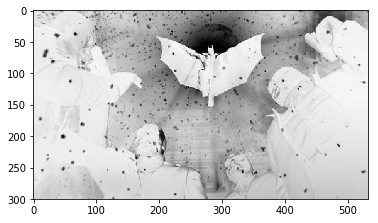

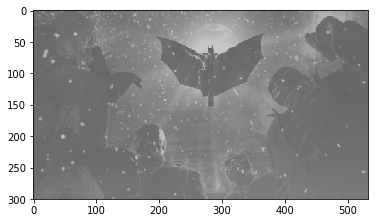

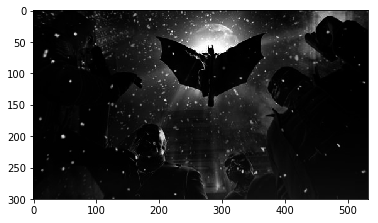

In [18]:
from PIL import Image
import numpy as np
from pylab import *

im = np.array(Image.open('img/batman.jpg').convert('L'))

im2 = 255 - im # invert image

im3 = (100/255.0) * im + 100 # clamp to interval 100...200

im4 = 255.0 * (im/255.0)**2 # spuard

imshow(Image.fromarray(im))
show()

imshow(Image.fromarray(im2))
show()

imshow(Image.fromarray(im3))
show()

imshow(Image.fromarray(im4))
show()

### Histogram equalization
直方图均一化

This transform
flattens the graylevel histogram of an image so that all intensities are as equally
common as possible. 
This is often a good way to <b>nmalize image intensity</b> before
further processing and also a way to <b>increase image contrast</b>.

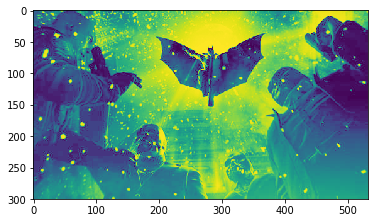

In [19]:
from PIL import Image
import numpy as np
from pylab import *

def histeq(im, nbr_bins=256):
    '''Histogram equalization of a grayscale image.'''
    
    # get image histogram
    imhist, bins = histogram(im.flatten(), bins=nbr_bins, normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(), bins[:-1], cdf)
    
    return im2.reshape(im.shape), cdf

im = np.array(Image.open('img/batman.jpg').convert('L'))
im2, cdf = histeq(im)

imshow(im2)
show()


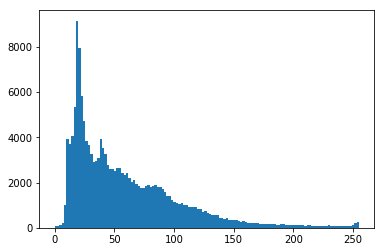

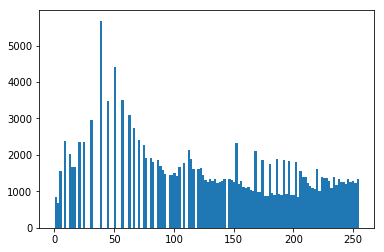

In [20]:
figure()
hist(im.flatten(), 128)
show()
hist(im2.flatten(), 128)
show()

### Averaging images

Averaging images is a simple way of reducing image noise and is also often used for
artistic effects.

In [ ]:
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = np.array(Image.open(imlist[0]), 'f')
    
    from imname in imlist[2:]:
        try:
            averageim += np.array(Image.open(imname))
        except:
            print(imname, '...skipped')
    averageim /= len(imlist)
    
    return np.array(averageim, dtype='uint8')